# Principles of Machine Learning - Final Exam - Regression

The task of this model is to predict the likely revenue per customer per month.

Our data foundation is a set of 16,400 previous customers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

In [2]:
restored = pd.read_csv("ExportedFeatures.csv")
restored_buyers = pd.read_csv("ExportedBuyers.csv")
restored_spend = pd.read_csv("ExportedSpend.csv")
restored_test = pd.read_csv("ExportedTest.csv")
Features = restored.to_numpy()
buyers = restored_buyers.to_numpy()
spend = restored_spend.to_numpy()
Test_Features = restored_test.to_numpy()

In [3]:
spend_scaler_config = pd.read_csv("ExportedScalerConfig.csv")
print(spend_scaler_config)
spend_scaler_config = np.array(spend_scaler_config.loc[0])
print(spend_scaler_config)

       mean     scale  variance
0  4.220003  0.344479  0.118666
[4.22000317 0.34447918 0.1186659 ]


In [4]:
restored_scaler = preprocessing.StandardScaler()
restored_scaler.mean_ = spend_scaler_config[0]
restored_scaler.scale_ = spend_scaler_config[1]
restored_scaler.var_ = spend_scaler_config[2]

test = spend[:5]
restored_scaler.inverse_transform(test)

array([[4.48863637],
       [4.76217393],
       [4.81218436],
       [3.91202301],
       [4.55387689]])

In [5]:
labels = spend
X_train, X_test, y_train, y_test = ms.train_test_split(Features, labels, test_size=0.33, random_state=42)

In [18]:
print("{} {} {} {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train)

(10990, 26) (5414, 26) (10990, 1) (5414, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 

y_test_real = np.e**restored_scaler.inverse_transform(y_test)
y_score_real = np.e**restored_scaler.inverse_transform(y_score)

for comp in range(10):    
    print("{} - {}".format(y_score_real[comp], y_test_real[comp]))

print_metrics(y_test, y_score, 28)

[58.75242591] - [58.]
[46.99549341] - [45.]
[72.15035446] - [71.]
[51.41869512] - [51.]
[92.96954392] - [91.]
[77.074641] - [73.]
[44.58981928] - [45.]
[104.53164459] - [104.]
[73.72095235] - [78.]
[78.10226463] - [79.]
Mean Square Error      = 0.0335196206705625
Root Mean Square Error = 0.18308364391873597
Mean Absolute Error    = 0.13913253446579396
Median Absolute Error  = 0.11291164346074593
R^2                    = 0.9654753164679974
Adjusted R^2           = 0.9653022443448329


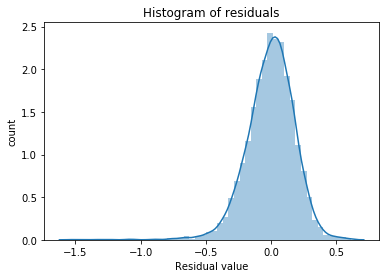

In [14]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

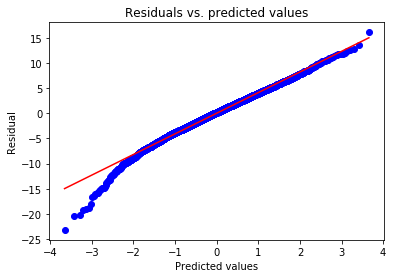

In [17]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test_real, y_score_real)

In [16]:
y_score = lin_mod.predict(Test_Features) 
y_score = np.e ** restored_scaler.inverse_transform(y_score)

for comp in y_score:    
    print(comp[0])

46.5817907799176
107.91783801068918
49.986080080261175
87.53342389535405
56.09912757113802
46.60874423153897
94.13328665115634
136.14302829024308
98.44603496258178
55.763630591447686
56.82929965316798
51.958422281410485
70.8169840668311
49.127281712906374
44.49302867138927
52.88539157512816
84.76772286140081
70.68462254257439
104.86656040010867
55.99842235711564
64.97037103055028
75.1240160506947
174.8626183081908
83.38634875538753
55.78866964095358
72.49882423005194
85.54656698702108
121.25228644756206
74.83716895046692
58.624355202899636
64.67464898140597
78.35981505366782
44.47933962836142
70.60702181481193
98.50911508682101
104.31059509885993
174.8828775349839
91.53810198727292
56.78067738137998
86.04699093647532
49.56606963907746
74.45920935404563
80.6770143263024
49.72274977321748
57.00554595279074
73.99517366460738
56.301048162810766
79.0860204544912
120.2434217051583
78.26800894071341
78.46334942501583
87.40156296774231
73.90267529733669
61.834839327229474
48.93665135663207
74.

In [21]:
from sklearn.neural_network import MLPRegressor

In [48]:
print("{} {} {} {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
y_train_nn = y_train.reshape(-1)

## define and fit the linear regression model
nn_mod = MLPRegressor(alpha=0.2, hidden_layer_sizes=100, max_iter=5000)
nn_mod.fit(X_train, y_train_nn)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = nn_mod.predict(X_test) 

y_test_real = np.e**restored_scaler.inverse_transform(y_test)
y_score_real = np.e**restored_scaler.inverse_transform(y_score)

for comp in range(10):    
    print("{} - {}".format(y_score_real[comp], y_test_real[comp]))

print_metrics(y_test, y_score, 28)

(10990, 26) (5414, 26) (10990, 1) (5414, 1)
57.008298026099595 - [58.]
47.38394795925261 - [45.]
69.41317215725537 - [71.]
52.94418693381481 - [51.]
93.22379879990645 - [91.]
77.94271488765798 - [73.]
45.45315551189686 - [45.]
101.41820435582012 - [104.]
77.5820144513135 - [78.]
78.45756858832273 - [79.]
Mean Square Error      = 0.022394111235795877
Root Mean Square Error = 0.14964662119739247
Mean Absolute Error    = 0.11206376421307698
Median Absolute Error  = 0.08633962623800917
R^2                    = 0.9769344166810543
Adjusted R^2           = 0.9768187889889616


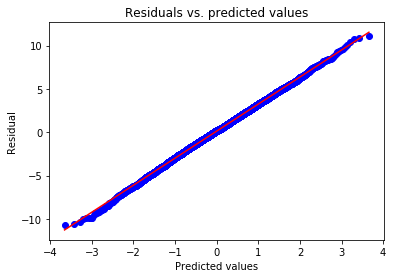

In [49]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test_real, y_score_real)

In [51]:
y_score = nn_mod.predict(Test_Features) 
y_score = np.e ** restored_scaler.inverse_transform(y_score)

for comp in y_score:    
    print(comp)

46.983411736536695
112.17805113390139
47.25427118966543
85.99864988677109
58.17414003479399
47.43842336814832
97.79478356586264
139.95159265604784
95.94545444830749
53.66239425329166
59.348195180535164
52.73509249204527
71.99505777810246
49.20735488095436
41.20567294763136
54.22893280775915
84.44150031597462
72.82379882636731
99.1473014371111
57.63643897208744
65.19487630367348
75.3473302193123
162.94009288359433
83.6713360842888
53.82081265731168
69.68500484374815
86.11949556071443
122.19418337332847
76.3030662285177
59.759477398256216
64.85061826890258
78.59985347520956
43.93295531565932
70.51218327586051
96.62350648718696
100.65483582427473
165.93381548961932
93.48946670204666
54.13806361222131
86.76360966482697
50.343012304015126
77.55725813141302
76.80146848986831
52.10543792251299
55.307238556357184
73.86409107855872
58.600190981582465
78.9224630370906
121.76028843932629
81.43455807361562
76.4846716507907
87.95922349502747
77.56057414517247
62.25669297645783
50.257398000933016
76